In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

In [2]:
course_information = pd.read_csv("/content/course_information.csv")
course_posts = pd.read_csv("/content/course_posts.csv")
course_threads = pd.read_csv("/content/course_threads.csv")

In [3]:
course_information.head(2)

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,103
1,Asset Pricing,assetpricing-001,9,12.5,9/30/2013,NaN,Q,E,673,NaN,392


In [4]:
course_information.describe(), course_information.dtypes

(          weeks  num_threads     num_users
 count  60.00000    60.000000     60.000000
 mean    8.75000  1660.466667   2037.066667
 std     2.55532  2075.689132   2441.960451
 min     5.00000   103.000000    103.000000
 25%     7.00000   460.000000    665.500000
 50%     8.00000   904.500000   1045.000000
 75%    10.00000  1645.250000   2423.000000
 max    17.00000  9300.000000  11989.000000, name               object
 course_id          object
 weeks               int64
 hours              object
 start_date         object
 end_date           object
 type               object
 language           object
 num_threads         int64
 mandatory_posts    object
 num_users           int64
 dtype: object)

In [5]:
#checking for the missing values
course_information.isnull().sum()

name                0
course_id           0
weeks               0
hours               0
start_date          0
end_date           57
type                0
language            0
num_threads         0
mandatory_posts    56
num_users           0
dtype: int64

In [6]:
#creating a new dataset with values sorted in a descending order
course_info_sorted =course_information.copy()
course_info_sorted.sort_values(by='num_threads', ascending= False,inplace= True)

# Figure 1

Text(0.5, 1.0, 'Number of threads Vs. Course Identifiers')

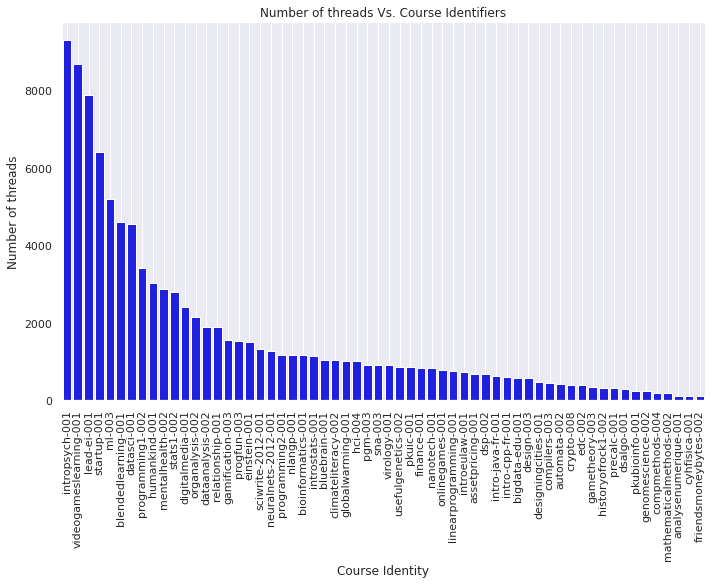

In [7]:
plt.figure(figsize=(10,8))
sns.barplot(data = course_info_sorted, x ='course_id', y = 'num_threads', color='blue');
plt.xticks(rotation = 90, horizontalalignment = 'center');

plt.xlabel("Course Identity")
plt.ylabel("Number of threads")
plt.grid()
plt.tight_layout();
plt.title("Number of threads Vs. Course Identifiers")

# Figure 3

CPU times: user 54.7 ms, sys: 0 ns, total: 54.7 ms
Wall time: 55.4 ms


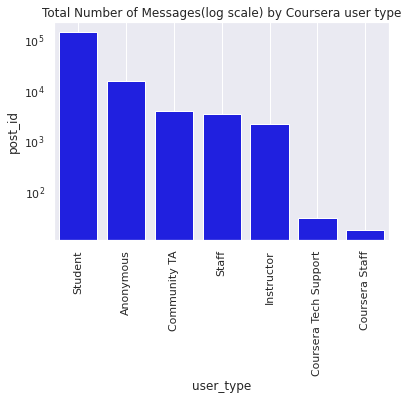

In [8]:
%%time
#using gorupby to make another dataframe with user_type and post id
course_posts_1 = course_posts.groupby('user_type')['post_id'].count()
#converting it into a dataframe
course_posts_1 = pd.DataFrame(data = course_posts_1)
#resetting index
course_posts_1.reset_index(inplace= True)
#arranging the data into descending order and using inplace = True to make changes to the dataframe
course_posts_1.sort_values('post_id', ascending = False, inplace= True)

#using seaborn to plot 
sns.barplot(data = course_posts_1, x = 'user_type', y = 'post_id', color = 'blue')
plt.yscale('log');
plt.xticks(rotation = 90, horizontalalignment = "center");
plt.title("Total Number of Messages(log scale) by Coursera user type")
plt.grid()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


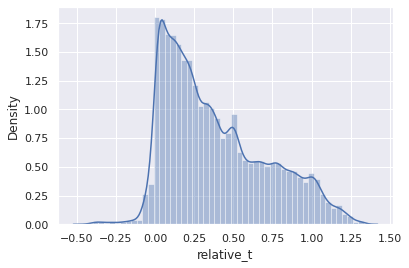

In [9]:
sns.distplot(course_posts['relative_t'])

In [10]:
course_information.head()

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,103
1,Asset Pricing,assetpricing-001,9,12.5,9/30/2013,NaN,Q,E,673,NaN,392
2,Automata,automata-002,6,9,11/4/2013,NaN,Q,E,429,NaN,493
3,Big Data in Education,bigdata-edu-001,8,7,10/24/2013,NaN,?,E,585,NaN,710
4,Bioinformatics Algorithms (Part 1),bioinformatics-001,12,9,11/4/2013,1/27/2014,Q,E,1160,NaN,941


# Figure 2

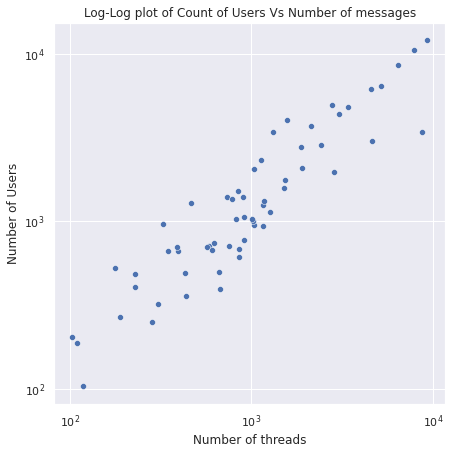

In [11]:
# Figure 2(b)(the graph i made shows increasing trend where as the one in the paper shows a decreasing trend)
# for part a i cannot understand the variable used to represent thread size
f, ax = plt.subplots(figsize = (7,7) )
ax.set(xscale = "log", yscale = "log")
sns.scatterplot(x = course_information.num_threads, y = course_information.num_users)
plt.xlabel('Number of threads')
plt.ylabel('Number of Users')
plt.title('Log-Log plot of Count of Users Vs Number of messages');


Checking for the common variables in course threads and course posts

In [12]:
Threads_intersection_posts = course_threads.columns.intersection(course_posts.columns)
print(Threads_intersection_posts)

Index(['thread_id', 'course_id', 'forum_id'], dtype='object')


Merging two dataframes course threads and course posts

In [13]:
c = pd.merge(course_threads, course_posts, on = ("thread_id","course_id","forum_id" ))

In [14]:
c[:2]

,thread_id,course_id,og_forum,og_forum_id,parent_forum,parent_forum_id,forum_chain,depth,num_views,num_tags,forum_id,post_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words
0,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13,3,0.0,1.0,0.000000e+00,Anonymous,1.358942e+09,-0.404753,2.0,23.0
1,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13,4,0.0,2.0,3.992068e+09,Instructor,1.359110e+09,-0.373994,0.0,15.0


Checking for the common variables in the merged file and the course information

In [15]:
info_threads_posts_intesection = c.columns.intersection(course_information.columns)
info_threads_posts_intesection

Index(['course_id'], dtype='object')

Merging all 3 dataframes together 

In [16]:
all = pd.merge(c, course_information, on = "course_id")
all[:2]

,thread_id,course_id,og_forum,og_forum_id,parent_forum,parent_forum_id,forum_chain,depth,num_views,num_tags,forum_id,post_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,name,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users
0,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13,3,0.0,1.0,0.000000e+00,Anonymous,1.358942e+09,-0.404753,2.0,23.0,Analyse Numérique pour Ingénieurs,9,5,2/18/2013,NaN,Q,FR,119,NaN,103
1,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13,4,0.0,2.0,3.992068e+09,Instructor,1.359110e+09,-0.373994,0.0,15.0,Analyse Numérique pour Ingénieurs,9,5,2/18/2013,NaN,Q,FR,119,NaN,103


In [17]:
all.columns

Index(['thread_id', 'course_id', 'og_forum', 'og_forum_id', 'parent_forum',
       'parent_forum_id', 'forum_chain', 'depth', 'num_views', 'num_tags',
       'forum_id', 'post_id', 'parent_id', 'order', 'user_id', 'user_type',
       'post_time', 'relative_t', 'votes', 'num_words', 'name', 'weeks',
       'hours', 'start_date', 'end_date', 'type', 'language', 'num_threads',
       'mandatory_posts', 'num_users'],
      dtype='object')

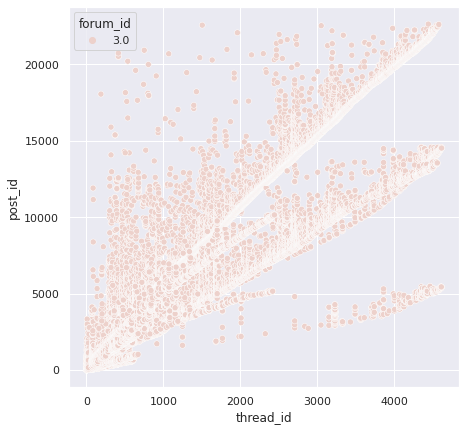

In [48]:
f, ax = plt.subplots(figsize = (7,7) )

sns.scatterplot(x = all.thread_id, y = all.post_id, hue = all.forum_id.where(all.forum_id == 3))
